<a href="https://www.kaggle.com/code/imenbakir/ann-mnist?scriptVersionId=119960107" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Importing Necessary libraries

In [1]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np

import warnings
warnings.filterwarnings("ignore") #used to stop unwanted warnings from showing when you execute codes


In [78]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical

### Loading Mnist data:

In [79]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [80]:
print('dimension of X_train :', X_train.shape)
print('dimension of X_test :', X_test.shape)
print('dimension of y_train :', y_train.shape)
print('dimension of y_test :', y_test.shape)

dimension of X_train : (60000, 28, 28)
dimension of X_test : (10000, 28, 28)
dimension of y_train : (60000,)
dimension of y_test : (10000,)


In [81]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [82]:
y_train[1]

0

In [83]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [84]:
#28*28 =784 shape of our image
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

#convert them to float 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [85]:
#Normalization to make our values between : [0,1]
X_train /=255
X_test /=255

In [86]:
nb_classes = 10
print('Dimension before applying one hot encoder: ', y_train.shape)

Dimension before applying one hot encoder:  (60000,)


In [87]:
y_train =to_categorical(y_train, num_classes=nb_classes, dtype='float32')

In [88]:
y_train.shape

(60000, 10)

### Creating our model:

In [89]:
model = Sequential()

In [90]:
model.add(Dense(400, input_shape=(784,)))
model.add(Activation('relu'))
#model.add(Dropout=(0.2))

model.add(Dense(400))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

In [91]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [92]:
y_test =to_categorical(y_test, num_classes=nb_classes, dtype='float32')

In [93]:
hist = model.fit(X_train, y_train, 
                batch_size=100,
                epochs=100,
                verbose=2,
                validation_data= (X_test, y_test))

Epoch 1/100
600/600 - 2s - loss: 0.2151 - accuracy: 0.9366 - val_loss: 0.1194 - val_accuracy: 0.9628 - 2s/epoch - 3ms/step
Epoch 2/100
600/600 - 1s - loss: 0.0798 - accuracy: 0.9751 - val_loss: 0.0878 - val_accuracy: 0.9727 - 1s/epoch - 2ms/step
Epoch 3/100
600/600 - 1s - loss: 0.0522 - accuracy: 0.9832 - val_loss: 0.0714 - val_accuracy: 0.9786 - 1s/epoch - 2ms/step
Epoch 4/100
600/600 - 1s - loss: 0.0385 - accuracy: 0.9875 - val_loss: 0.0754 - val_accuracy: 0.9785 - 1s/epoch - 2ms/step
Epoch 5/100
600/600 - 1s - loss: 0.0288 - accuracy: 0.9909 - val_loss: 0.0837 - val_accuracy: 0.9764 - 1s/epoch - 2ms/step
Epoch 6/100
600/600 - 2s - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0.0678 - val_accuracy: 0.9826 - 2s/epoch - 3ms/step
Epoch 7/100
600/600 - 2s - loss: 0.0186 - accuracy: 0.9938 - val_loss: 0.0799 - val_accuracy: 0.9793 - 2s/epoch - 3ms/step
Epoch 8/100
600/600 - 1s - loss: 0.0183 - accuracy: 0.9937 - val_loss: 0.0717 - val_accuracy: 0.9822 - 1s/epoch - 2ms/step
Epoch 9/100
600/

In [94]:
y_test.shape

(10000, 10)

In [95]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 400)               314000    
                                                                 
 activation_21 (Activation)  (None, 400)               0         
                                                                 
 dense_23 (Dense)            (None, 400)               160400    
                                                                 
 activation_22 (Activation)  (None, 400)               0         
                                                                 
 dense_24 (Dense)            (None, 10)                4010      
                                                                 
 activation_23 (Activation)  (None, 10)                0         
                                                                 
Total params: 478,410
Trainable params: 478,410
Non-tr

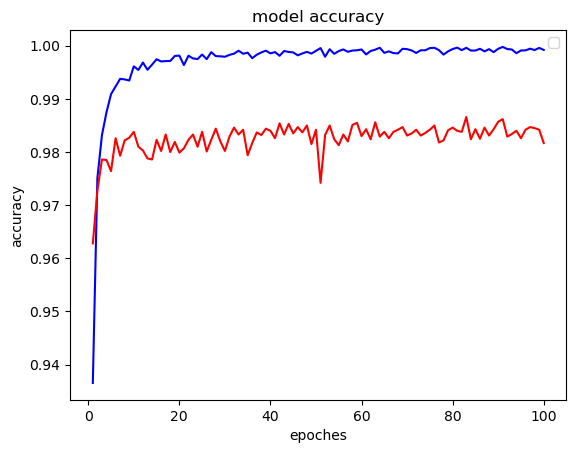

In [96]:
val_acc = hist.history['val_accuracy']
acc = hist.history['accuracy']
epoches= range(1, len(acc)+1)
plt.plot(epoches, acc, 'b')
plt.plot(epoches, val_acc, 'r-')
plt.title('model accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.legend('train', 'validation')

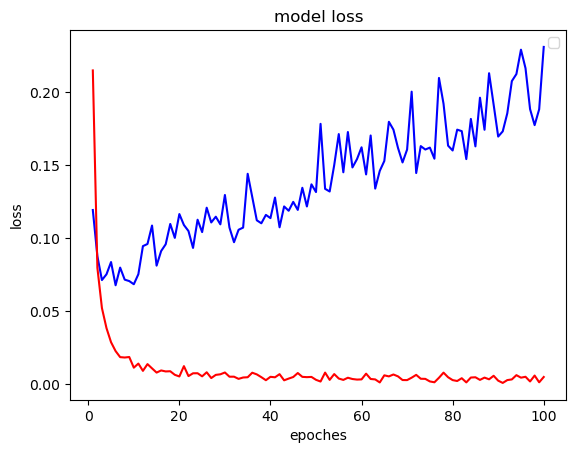

In [97]:
val_loss = hist.history['val_loss']
loss = hist.history['loss']
epoches= range(1, len(loss)+1)
plt.plot(epoches, val_loss, 'b')
plt.plot(epoches, loss, 'r-')
plt.title('model loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.legend('train', 'validation')

### Adding dropout layers

In [98]:
model = Sequential()

In [106]:
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [107]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [108]:
hist = model.fit(X_train, y_train, 
                batch_size=100,
                epochs=100,
                verbose=2,
                validation_data= (X_test, y_test))

Epoch 1/100
600/600 - 2s - loss: 0.0677 - accuracy: 0.9948 - val_loss: 0.1254 - val_accuracy: 0.9838 - 2s/epoch - 4ms/step
Epoch 2/100
600/600 - 2s - loss: 0.0287 - accuracy: 0.9962 - val_loss: 0.1237 - val_accuracy: 0.9841 - 2s/epoch - 3ms/step
Epoch 3/100
600/600 - 2s - loss: 0.0263 - accuracy: 0.9965 - val_loss: 0.1057 - val_accuracy: 0.9854 - 2s/epoch - 3ms/step
Epoch 4/100
600/600 - 2s - loss: 0.0252 - accuracy: 0.9965 - val_loss: 0.1387 - val_accuracy: 0.9828 - 2s/epoch - 3ms/step
Epoch 5/100
600/600 - 2s - loss: 0.0293 - accuracy: 0.9962 - val_loss: 0.1253 - val_accuracy: 0.9845 - 2s/epoch - 3ms/step
Epoch 6/100
600/600 - 2s - loss: 0.0274 - accuracy: 0.9963 - val_loss: 0.1234 - val_accuracy: 0.9847 - 2s/epoch - 3ms/step
Epoch 7/100
600/600 - 2s - loss: 0.0299 - accuracy: 0.9961 - val_loss: 0.1376 - val_accuracy: 0.9815 - 2s/epoch - 3ms/step
Epoch 8/100
600/600 - 2s - loss: 0.0266 - accuracy: 0.9964 - val_loss: 0.1104 - val_accuracy: 0.9856 - 2s/epoch - 3ms/step
Epoch 9/100
600/

In [117]:
#save model
#visualize accuracy (train vs test)
#first 10 values : comparison between correct indices and incorrect
#change optimizer's parameters (adam)
#change dropout =0.3

In [118]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 400)               314000    
                                                                 
 activation_24 (Activation)  (None, 400)               0         
                                                                 
 dropout_7 (Dropout)         (None, 400)               0         
                                                                 
 dense_26 (Dense)            (None, 400)               160400    
                                                                 
 activation_25 (Activation)  (None, 400)               0         
                                                                 
 dropout_8 (Dropout)         (None, 400)               0         
                                                                 
 dense_27 (Dense)            (None, 10)               

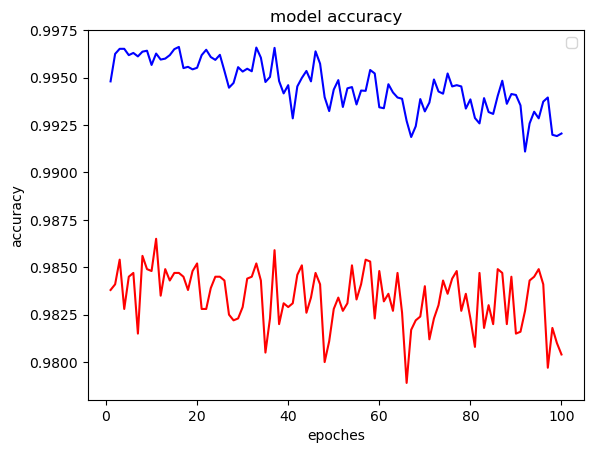

In [119]:
val_acc = hist.history['val_accuracy']
acc = hist.history['accuracy']
epoches= range(1, len(acc)+1)
plt.plot(epoches, acc, 'b')
plt.plot(epoches, val_acc, 'r-')
plt.title('model accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.legend('train', 'validation')

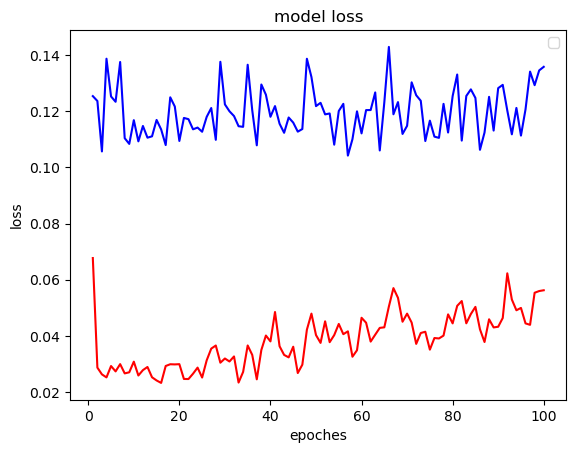

In [120]:
val_loss = hist.history['val_loss']
loss = hist.history['loss']
epoches= range(1, len(loss)+1)
plt.plot(epoches, val_loss, 'b')
plt.plot(epoches, loss, 'r-')
plt.title('model loss')
plt.xlabel('epoches')
plt.ylabel('loss')
plt.legend('train', 'validation')